## Linoy Medalsy
#### ID: 206073124

In [1]:
import pandas as pd 
import numpy as np
import datetime
from datetime import timedelta

In [2]:
url1 = "C:/Users/linoy/OneDrive/שולחן העבודה/לימודים/תואר/שנה ג/סמסטר ב/כרייה וניתוח נתונים מתקדם בפייתון/קודים/מטלות/מטלה 2/matala2_cosmetics_2019-Nov\matala2_cosmetics_2019-Nov.csv"
data = pd.read_csv(url1)
data

C:\Users\linoy\AppData\Local\Temp\ipykernel_3956\670980237.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url1)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


### Data preparation
##### we look at the types of columns and how much Null types each have to see if we want to change them

In [3]:
data.info()
data.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   event_time     object
 1   event_type     object
 2   product_id     int64 
 3   category_id    int64 
 4   category_code  object
 5   brand          object
 6   price          object
 7   user_id        int64 
 8   user_session   object
dtypes: int64(3), object(6)
memory usage: 318.3+ MB


event_time             0
event_type             0
product_id             0
category_id            0
price                  0
user_id                0
user_session         813
brand            1986029
category_code    4560089
dtype: int64

##### As we can see 'brand' and 'category_code' columns contain a lot of NULL values, currently we have no use for them and therefore we will not deal with handling these columns.

In [4]:
#Convert times to datetime:
data['event_time'] = data['event_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))
data['event_time'].dtype

dtype('<M8[ns]')

## Q1

### Adding 'duration to next event' column.

In [5]:
# Sort the data by 'user_id', 'user_session', and 'event_time'
data = data.sort_values(by=['user_id', 'user_session', 'event_time'])

# Add a new column 'duration_to_next_event' that holds the time in seconds
# from the current event to the next event for the same user_session
data['duration_to_next_event'] = (data.groupby(['user_id', 'user_session'])['event_time'].diff().dt.total_seconds().fillna(0))
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0.0
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0
2641209,2019-11-20 11:59:39,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0
...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,14.0
4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0
4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0
4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0


## Q2

### Adding 'funnel number column'.
#### It was defined in the question that new funnel is when there is a difference of more than 5 days between visits. 
#### I measured a 5 day difference between events by the entire timestamp and not by days only.


In [6]:
# sort the dataframe by user_id and session_date
data = data.sort_values(['user_id', 'event_time'])

# Add a temporary column to calculate the time difference between visits
data['time_diff'] = data.groupby('user_id')['event_time'].diff(periods=1)

# convert time_diff to timedelta
data['time_diff'] = pd.to_timedelta(data['time_diff'], unit='d')

# identify start of new funnel for each user
funnel_start = data['time_diff'] > pd.Timedelta(5, unit='d')

# create funnel number for each user
data['funnel_number'] = funnel_start.groupby(data['user_id']).cumsum()+1

# drop temporary columns
data = data.drop(columns=['time_diff'])

data.tail(10)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
4635543,2019-11-30 23:49:28,view,5809910,1602943681873052386,NaN,grattol,5.24,579966992,868f2e3c-f79e-41bc-a903-267fb195a6af,0.0,1
4635578,2019-11-30 23:50:13,view,5881428,1487580013506068678,NaN,lovely,14.29,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,0.0,1
4635655,2019-11-30 23:53:24,view,5873630,1487580009471148064,NaN,irisk,3.97,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,0.0,1
4635713,2019-11-30 23:55:43,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1
4635724,2019-11-30 23:56:00,view,5886282,1487580013950664926,NaN,NaN,21.59,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,17.0,1
4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,14.0,1
4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1
4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1
4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1
4635836,2019-11-30 23:59:58,view,5880201,2029731308699124089,NaN,rasyan,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b,0.0,1


## Q3

### Adding 'index in funnel' column.

In [7]:
# create temporary column to check the conditions for new index.
data['is_new_index'] = ((data['user_id'].shift(1) == data['user_id']) &
                        (data['funnel_number'].shift(1) == data['funnel_number']) &
                        (data['user_session'].shift(1) != data['user_session']))

# create index for each event within a funnel number and user id.
data["index_in_funnel"] = data.groupby(['user_id','funnel_number'])["is_new_index"].cumsum() + 1
data.drop('is_new_index', axis=1, inplace=True)

data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0.0,1,3
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,14.0,1,1
4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1,1
4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1,1
4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1,1


## Q4

### fix the 'price' column values.

In [8]:
#Fix the values of price column and convert them to float:
import re

data['price'] = data['price'].astype(str)
data['price'] = data['price'].apply(lambda x: re.sub('[^\d.]', '', x))
data['price'] = pd.to_numeric(data['price'], errors='coerce').astype('float')

data['price'].dtype

dtype('float64')

## Q5

### A chart depicting the number of events of each type.

In [9]:
#present values count of 'event_type' column to decide which type of graph is more correct to show the data
event_type_data = data['event_type'].value_counts()
event_type_data

view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: event_type, dtype: int64

Text(0, 0.5, 'Number of events')

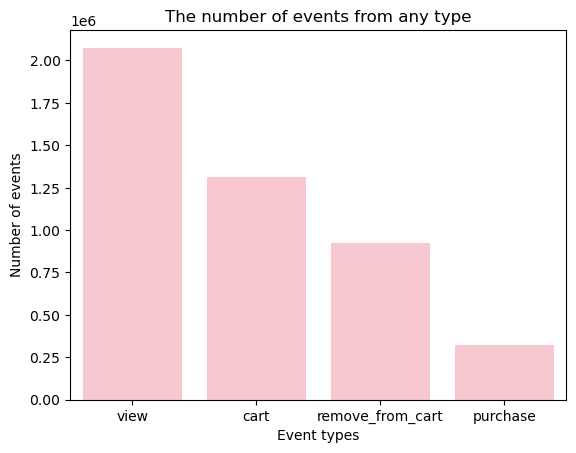

In [10]:
#countplot the event type.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='event_type', data=data, color = "pink");

# Set plot title and axis labels
plt.title('The number of events from any type')
plt.xlabel('Event types')
plt.ylabel('Number of events')


## Q6

### Creating a new dataframe named session_data where each row will represent a visit to the website.

In [11]:
# Extract relevant information from data and group by user session
session_info = data.groupby('user_session', group_keys=False).agg({
    'user_id': 'max',
    'funnel_number': 'max',
    'index_in_funnel': 'max',
    'event_time': 'count',
    'duration_to_next_event': 'sum',
})

# Rename the 'event_type' column to 'number_of_session_events'
session_info = session_info.rename(columns={'event_type': 'number_of_session_events'})

# Calculate session time in seconds
session_info['session_duration(seconds)'] = session_info['duration_to_next_event']
# Extract product information for each event type and group by user session
cart_data = data[data['event_type'] == 'cart'].groupby('user_session')['product_id'].apply(list)
view_data = data[data['event_type'] == 'view'].groupby('user_session')['product_id'].apply(list)
purchase_data = data[data['event_type'] == 'purchase'].groupby('user_session')['product_id'].apply(list)

# Concatenate product information for each event type into a single data frame
events_data = pd.concat([cart_data, view_data, purchase_data], axis=1, join='outer')
events_data.columns = ['list_of_viewed', 'list_of_added_to_cart', 'list_of_purchased']

# Concatenate session_info and product_data horizontally
session_data = pd.concat([session_info, events_data], axis=1, join='outer')

# Drop the irrelevant columns.
session_data.drop(['event_time', 'duration_to_next_event'], axis=1, inplace=True)

# Switch the index column with the first column
session_data = session_data.reset_index().rename(columns={'index': 'user_id'}).set_index('user_id')

In [12]:
session_data

,user_session,funnel_number,index_in_funnel,session_duration(seconds),list_of_viewed,list_of_added_to_cart,list_of_purchased
user_id,,,,,,,
556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,1,0.0,NaN,[5829298],NaN
570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,1,2,0.0,NaN,[5771614],NaN
571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,1,1,0.0,NaN,[5568472],NaN
504468592,00004c7d-9507-474e-a559-0fdaccaaa390,2,6,0.0,NaN,[5864850],NaN
571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,1,2,151.0,NaN,"[5861620, 5861619, 5861591]",NaN
...,...,...,...,...,...,...,...
576334415,ffff5096-a5d3-4abf-b34b-9627203bb025,1,1,0.0,NaN,[5790563],NaN
577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,1,1,74.0,NaN,"[5588154, 5676246]",NaN
560528468,ffff8044-2a22-4846-8a72-999e870abbe9,1,4,0.0,NaN,[5847328],NaN
